# Graphiques du Tableau pour Cerlico : Excitation & Discours

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [4]:
pd.__version__

u'0.23.1'

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
#sns.palplot(sns.color_palette("hls", 20))
sns.set_context("paper")
sns.set_context("notebook")

In [7]:
spkNoms={"spk1":"journaliste","spk2":"expert","spk3":"terrain"}

In [8]:
with open("partieGlobale.pkl","rb") as inFile:
    dfComplet=pickle.load(inFile)

In [9]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')

In [10]:
dfComplet[dfComplet["début"]>2710].set_index("timeline")[["RJ5.00","excitation"]]

,RJ5.00,excitation
timeline,,
271033.0,NaN,NaN
271068.0,NaN,2.0
271068.0,NaN,NaN
271101.0,NaN,NaN
271214.0,NaN,NaN
271249.0,NaN,NaN
271270.0,NaN,NaN
271324.0,NaN,NaN
271374.0,NaN,NaN


## Interpolation des valeurs numériques

In [11]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

## Remise à zéro des valeurs numériques pendant la mi-temps

In [12]:
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "): 
    dfMatch.loc[(dfMatch.index>271985)&(dfMatch.index<325843),c]=0

In [13]:
dfMatch[((dfMatch.index>271985)&(dfMatch.index<325843))][["excitation","RJ5.00"]]
#dfMatch.columns

,excitation,RJ5.00
timeline,,
272000.0,0.0,0.0
272100.0,0.0,0.0
272200.0,0.0,0.0
272300.0,0.0,0.0
272400.0,0.0,0.0
272500.0,0.0,0.0
272600.0,0.0,0.0
272700.0,0.0,0.0
272800.0,0.0,0.0


# Graphiques

## Corrélation excitation — rythme de jeu

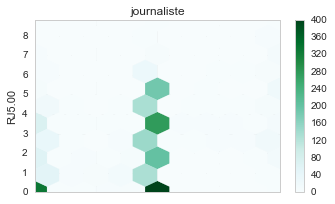

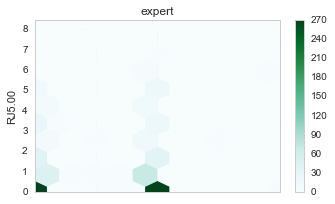

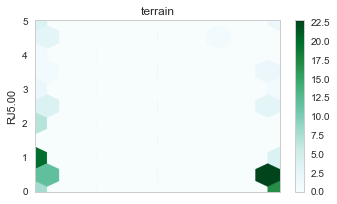

In [36]:
#for spk in ["spk%d"%(i+1) for i in range(3)]:
#    ax=dfMatch[dfMatch["Spk"]==spk].plot.scatter("excitation","RJ5.00",figsize=(5,3),title=spkNoms[spk])
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.hexbin("excitation","RJ5.00",
                                                figsize=(5,3),
                                                title=spkNoms[spk],
                                                gridsize=10)
    plt.tight_layout()
    plt.savefig('HB-ExcitationRythme-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()


## Distribution de l'excitation par speaker

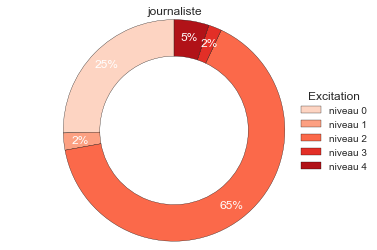

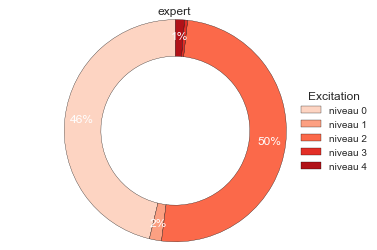

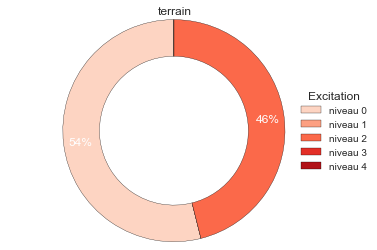

In [19]:

for spk in ["spk%d"%(i+1) for i in range(3)]:
    dfAX=pd.cut(dfMatch[dfMatch["Spk"]==spk]["excitation"],[0,0.5,1.5,2.5,3.5,5],include_lowest=True,labels=range(5)).reset_index().groupby(by="excitation").count()
    ax=dfAX.plot(kind="pie",y="timeline",
#                 figsize=(5,5),
                 title=u"%s"%spkNoms[spk],
                 labels=None,
                 colors=sns.color_palette("Reds", 5),
#                 explode=[0.05,0,0.05,0,0],
                 startangle=90,
                 wedgeprops=dict(width=0.33),
                 radius=1,
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
                 pctdistance = 0.85,
                 textprops=dict(color="w",), 
                 
                )
    ax.set(ylabel="")
    ax.legend(labels=["niveau %d"%i for i in range(5)],
          title="Excitation",
          loc="center left",
          bbox_to_anchor=(.85, 0, 0.5, 1))
    ax.axis('equal')
#    plt.tight_layout()
    plt.savefig('PC-Excitation-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()
    

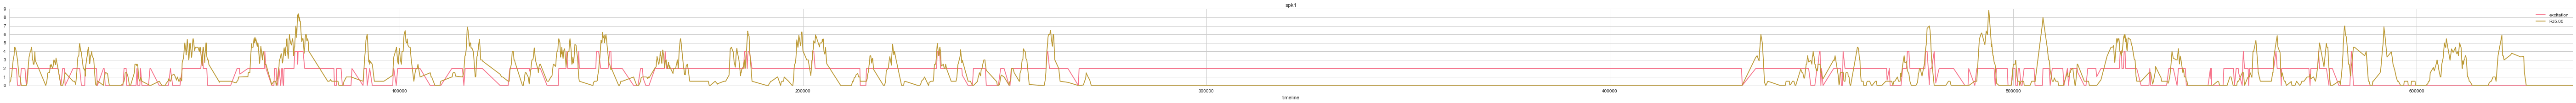

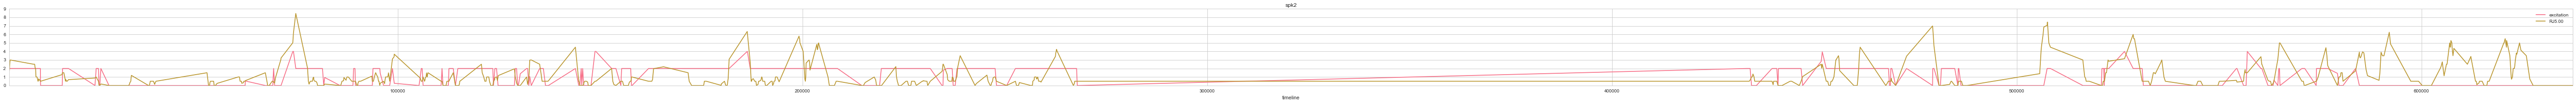

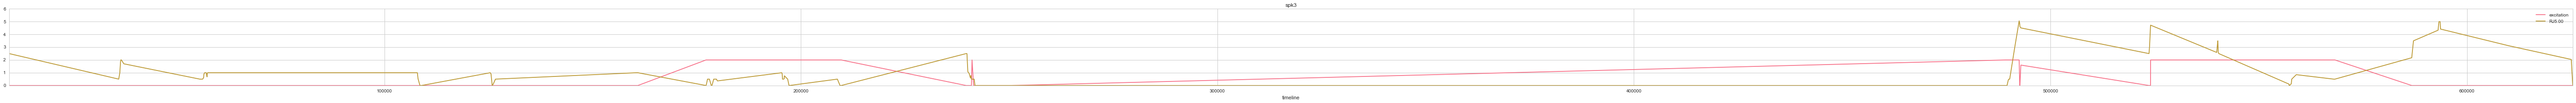

In [22]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk][["excitation","RJ5.00"]].plot(kind="line",
                                                                  figsize=(100,3),
                                                                  title=spk,
#                                                                  color="rg",
                                                                 )
    plt.savefig('TM-ExcitationRythme-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()

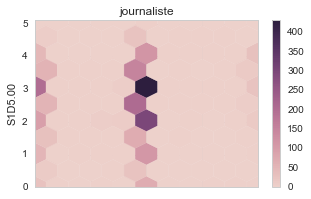

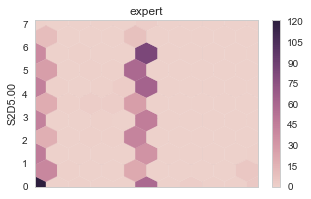

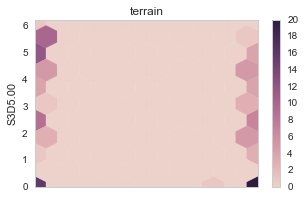

In [37]:
#for spk in ["spk%d"%(i+1) for i in range(3)]:
#    ax=dfMatch[dfMatch["Spk"]==spk].plot.scatter("excitation","S%sV5.00"%spk[-1],figsize=(5,3),title=spk)
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk].plot.hexbin("excitation","S%sD5.00"%spk[-1],
                                                figsize=(5,3),title=spkNoms[spk],gridsize=10,
                                                cmap=sns.cubehelix_palette(250,as_cmap=True),
                                               )
    plt.savefig('HB-ExcitationDebit-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()

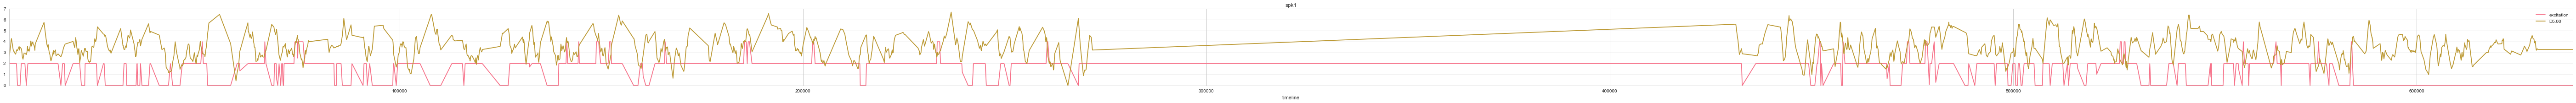

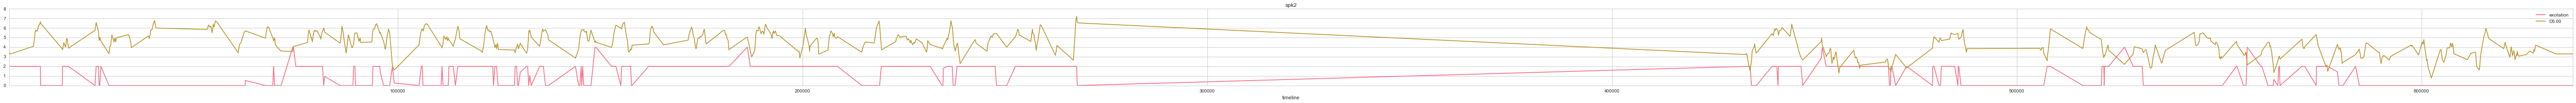

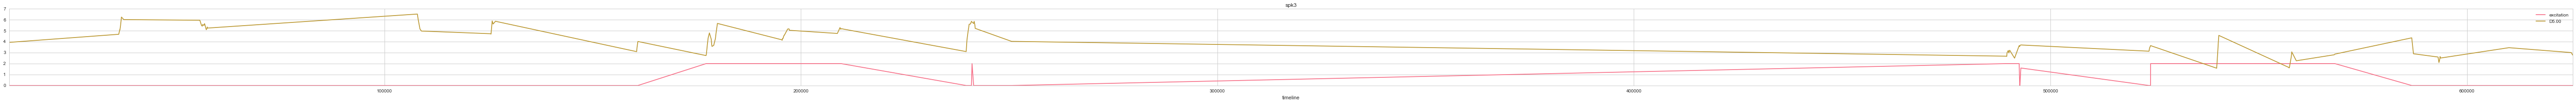

In [18]:
for spk in ["spk%d"%(i+1) for i in range(3)]:
    ax=dfMatch[dfMatch["Spk"]==spk][["excitation","D5.00"]].plot(kind="line",figsize=(100,3),title=spk)
    plt.savefig('TM-ExcitationDebit-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()

In [110]:
dfMatch.loc[dfMatch["discours"]==u"affimation","discours"]=u"affirmation"
dfMatch.loc[dfMatch["discours"]==u"régulateur","discours"]=u"régulation"

In [111]:
def regrouperPies(kv,seuil=0.05):
    seuilRegroupement=seuil
    total=0
    autresV=0
    kvResult={}
    for k,v in kv.iteritems():
        total+=v
    for k,v in kv.iteritems():
        if float(v)/total>=seuilRegroupement:
            kvResult[k]=v
        else:
            autresV+=v
    kvResult["autres"]=autresV
    return kvResult

In [112]:
discoursNb={}
discoursNbSpk={}
discoursNbKeys=dfMatch.groupby(["discours","Spk"])["texte"].count().to_dict()
for dKey,spk in discoursNbKeys:
    print dKey,spk
    if spk not in discoursNbSpk:
        discoursNbSpk[spk]={}
#    print dKey
    if "," in dKey:
        dKeys=[k.strip() for k in dKey.split(",") if k!=""]
    else: dKeys=[dKey.strip()]
    for k in dKeys:
        if k not in discoursNb:
            discoursNb[k]=0
        discoursNb[k]+=discoursNbKeys[(dKey,spk)]
        if k not in discoursNbSpk[spk]:
            discoursNbSpk[spk][k]=0
        discoursNbSpk[spk][k]+=discoursNbKeys[(dKey,spk)]
discoursNb,discoursNbSpk

explication,narration spk1
affirmation spk2
point de vue,narration suspensive spk1
narration suspensive spk1
point de vue,régulation spk2
explication,affirmation spk2
narration,affirmation spk2
 spk3
affirmation,narration suspensive spk3
narration,narration suspensive spk2
explication spk3
narration,injonction spk2
point de vue,explication spk1
point de vue spk2
point de vue,narration spk1
explication,point de vue spk2
point de vue,explication spk2
narration,point de vue spk2
régulation spk2
narration,explication spk2
narration spk3
question spk1
narration,question spk1
invocation,narration spk1
narration suspensive spk3
injonction spk3
invocation spk3
point de vue spk3
prescription spk1
injonction,narration,explication spk2
description spk3
point de vue,question spk1
affirmation spk1
explication spk2
narration suspensive,narration spk1
réprobation,injonction spk1
point de vue,description spk1
narration,affirmation spk3
narration,explication spk1
narration spk2
régulation spk1
point de

({'': 7,
  'affirmation': 81,
  'description': 71,
  u'encouragement': 5,
  u'explication': 344,
  'injonction': 49,
  'invocation': 11,
  u'narration': 872,
  u'narration suspensive': 159,
  u'point de vue': 192,
  u'prescription': 6,
  'question': 9,
  u'r\xe9gulation': 13,
  u'r\xe9probation': 9,
  'satisfaction': 1},
 {u'spk1': {'': 3,
   'affirmation': 33,
   u'description': 47,
   u'explication': 99,
   u'injonction': 23,
   'invocation': 7,
   u'narration': 622,
   u'narration suspensive': 133,
   u'point de vue': 86,
   u'prescription': 2,
   'question': 9,
   u'r\xe9gulation': 5,
   u'r\xe9probation': 2,
   'satisfaction': 1},
  u'spk2': {'': 3,
   'affirmation': 31,
   'description': 17,
   u'encouragement': 5,
   'explication': 241,
   'injonction': 25,
   u'invocation': 1,
   'narration': 204,
   'narration suspensive': 23,
   u'point de vue': 90,
   u'prescription': 4,
   u'r\xe9gulation': 6,
   u'r\xe9probation': 7},
  u'spk3': {'': 1,
   'affirmation': 17,
   'descriptio

In [113]:
regrouperPies(discoursNbSpk["spk1"],.01)

{'affirmation': 33,
 'autres': 29,
 u'description': 47,
 u'explication': 99,
 u'injonction': 23,
 u'narration': 622,
 u'narration suspensive': 133,
 u'point de vue': 86}

In [114]:
def colorerPies(kv,colorPie):
    explodes=["narration"]
    seuil=.1
    total=sum(kv.values())
    lWedges=[]
    cLabels=[]
    lLabels=[]
    lColors=[]
    lExplode=[]
    for l,c in colorPie:
#        print l,c
        if l in kv:
            lWedges.append(kv[l])
            if float(kv[l])/total>=seuil:
                cLabels.append(l)
            else:
                cLabels.append("")
            lLabels.append(l)
            lColors.append(c)
            if l in explodes:
                lExplode.append(0.05)
            else:
                lExplode.append(0)
    return lWedges,cLabels,lLabels,lColors,lExplode

In [115]:
discoursKeys=[k for k in discoursNb.keys() if k!=""]
for n,e in enumerate(discoursKeys):
    print n,e

0 point de vue
1 prescription
2 description
3 réprobation
4 question
5 explication
6 régulation
7 satisfaction
8 affirmation
9 encouragement
10 narration
11 invocation
12 narration suspensive
13 injonction


In [116]:
discoursKeysOrdre=[10,12,5,2,0,7,3,4,8,6,1,11,9,13]
discoursKeys=[discoursKeys[i] for i in discoursKeysOrdre]
for n,e in enumerate(discoursKeys):
    print n,e

0 narration
1 narration suspensive
2 explication
3 description
4 point de vue
5 satisfaction
6 réprobation
7 question
8 affirmation
9 régulation
10 prescription
11 invocation
12 encouragement
13 injonction


In [117]:
couleurs=sns.color_palette("hls",n_colors=len(discoursKeys)+5)
colorPie=[(l,couleurs[i]) for i,l in enumerate(discoursKeys)]+[("autres",couleurs[len(discoursKeys)])]
colorPie

[(u'narration', (0.86, 0.37119999999999997, 0.33999999999999997)),
 (u'narration suspensive', (0.86, 0.53541052631578934, 0.33999999999999997)),
 (u'explication', (0.86, 0.69962105263157892, 0.33999999999999997)),
 ('description', (0.85616842105263158, 0.86, 0.33999999999999997)),
 (u'point de vue', (0.69195789473684222, 0.86, 0.33999999999999997)),
 ('satisfaction', (0.52774736842105252, 0.86, 0.33999999999999997)),
 (u'r\xe9probation', (0.36353684210526294, 0.86, 0.33999999999999997)),
 ('question', (0.33999999999999997, 0.86, 0.48067368421052631)),
 ('affirmation', (0.33999999999999997, 0.86, 0.64488421052631573)),
 (u'r\xe9gulation', (0.33999999999999997, 0.86, 0.80909473684210531)),
 (u'prescription', (0.33999999999999997, 0.74669473684210519, 0.86)),
 ('invocation', (0.33999999999999997, 0.58248421052631549, 0.86)),
 (u'encouragement', (0.33999999999999997, 0.41827368421052624, 0.86)),
 ('injonction', (0.42593684210526261, 0.33999999999999997, 0.86)),
 ('autres', (0.5901473684210

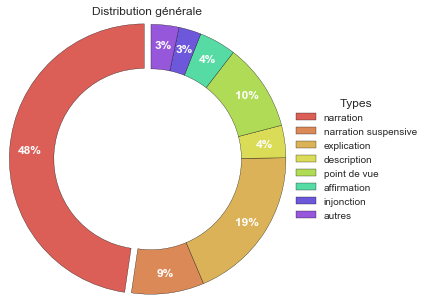

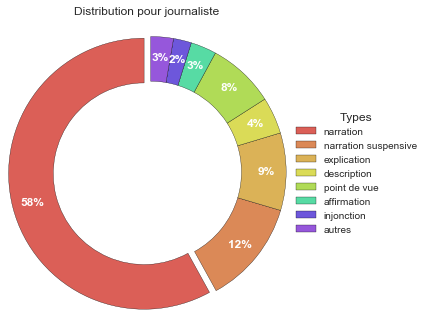

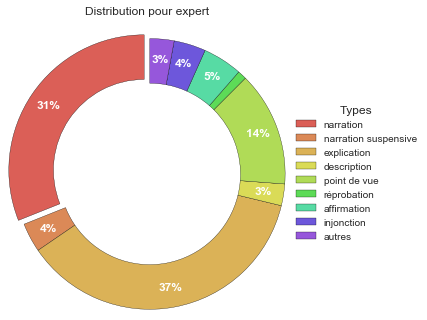

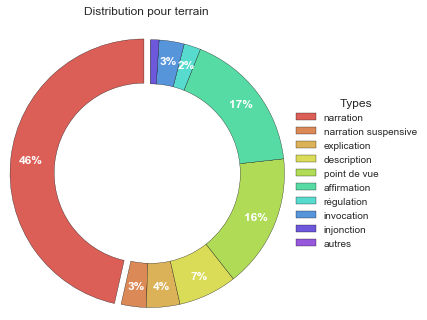

In [158]:
seuilDict=0.01
pieDict=regrouperPies(discoursNb,seuil=seuilDict)
wedges,labelsC,labelsL,colors,explode=colorerPies(pieDict,colorPie)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wedges, labels=None, textprops=dict(color="w",fontweight="bold"), colors=colors, explode=explode,
        startangle=90,
        wedgeprops=dict(width=0.33),
        autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
        pctdistance = 0.85,
       )
ax1.axis('equal')
ax1.set_title(u"Distribution générale",y=1.0)
ax1.legend(wedges, labels=labelsL,
          title="Types",
          loc="center right",
         bbox_to_anchor=(1.5, .5),
          )

plt.savefig('PC-Discours-DistributionGenerale.png', dpi=150, bbox_inches="tight")
plt.show()

for spk in discoursNbSpk:
    pieDict=regrouperPies(discoursNbSpk[spk],seuil=seuilDict)
    wedges,labelsC,labelsL,colors,explode=colorerPies(pieDict,colorPie)
    fig1, ax1 = plt.subplots(figsize=(5, 5))
    ax1.pie(wedges, labels=None, 
            textprops=dict(color="w",fontweight="bold"), 
            colors=colors,explode=explode,
            startangle=90,
            wedgeprops=dict(width=0.33),
            autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
            pctdistance = 0.85,
           )
    ax1.axis('equal')
    ax1.set_title(u"Distribution pour %s"%spkNoms[spk],y=1.05)
    ax1.legend(wedges, labels=labelsL,
               title="Types",
               loc="center right",
               bbox_to_anchor=(1.5, .5),
              )
    plt.savefig('PC-Discours-Distribution-%s.png'%spkNoms[spk].capitalize(), dpi=150, bbox_inches="tight")
    plt.show()


# Corrélations entre Entités nommées et discours

In [ ]:
dfComplet[(dfComplet["texte"].notnull()) & (dfComplet["texte"].str.contains(u"Pichot"))][["texte"]]

In [ ]:
gbNoms=dfComplet[(dfComplet["texte"].notnull()) & (dfComplet["joueurs"].str.contains(u""))].groupby(["Spk","joueurs","noms"])["noms"].count()

In [ ]:
dfTest=dfComplet.reset_index()

In [ ]:
temp=dfTest[(dfTest["noms"].notnull())& (~dfTest["noms"].str.contains(",",na=False))][["texte","noms","joueurs","Spk","index"]].groupby(["joueurs","Spk","noms"])
temp[["texte","index"]].aggregate(lambda x: ';'.join([unicode(l) for l in x]))

In [ ]:
dfComplet.iloc[11570:11590][["discours","émotion","excitation","noms","joueurs","texte","Spk"]]

In [ ]:
dfMatch[dfMatch["discours"].str.contains("narration suspensive")][["discours","texte","joueurs"]]

In [ ]:
dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&~(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))][["discours","texte","joueurs"]]

In [ ]:
dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))&(dfMatch["Spk"]=="spk1")][["discours","texte","joueurs","Spk"]]

In [ ]:
dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&~(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))&(dfMatch["Spk"]=="spk1")][["discours","texte","joueurs","Spk","texte-PxP"]]


In [ ]:
for num,t in enumerate(dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&~(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))]["texte"].iteritems()):
    print num,t

In [ ]:
for num,t in enumerate(dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&~(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))]["texte"].iteritems()):
    print num,t

In [ ]:
dfMatch[(dfMatch["joueurs"].notnull())&(dfMatch["texte"].str.split(" ").str.len()<=4)&~(dfMatch["discours"].str.contains("narration suspensive"))&(dfMatch["discours"].str.contains("narration"))&(dfMatch["Spk"]=="spk1")][["discours","texte","noms","Spk","texte-PxP","RJ5.00","S1D5.00"]]
